<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting air pollution level in an area in Eindhoven in the upcoming week.

We're going to take the following approach:
1. Problem definition
2. Data
3. Features
4. Data Exploration & Visualization
5. Data Preparation
6. Modelling

<h2><font color=slateblue> 1. Problem Definition </font></h2>

In a statement,
> Given historical pollution data, weather data and people going through an area, can we predict air pollution level in an area in Eindhoven in the upcoming week?

<h2><font color=slateblue> 2. Data </font></h2>

The data is provided by TNO and Zicht op Data.

<h2><font color=slateblue> 3. Features </font></h2>

This is where you'll get different information about each of the features in our data.

We have three separate datasets for the period between 25-09-2021 and 30-12-2021:

**Air pollution**
* date: date in ymd_hms
* PC4: postcode
* pm2.5: particulate matter <2.5um in ug/m3
* pm10: particulate matter <10um in ug/m3
* no2: nitrogen dioxide in ug/m3
* no: nitrogen oxide in ug/m3
* so2: sulphur dioxide in ug/m3


**Meteo**
* date: date in ymd_hms
* PC4: postcode
* wd: wind direction in degrees 0-360
* ws: wind speed in m/s
* blh: boundary layer height in metres
* tcc: total cloud cover in oktas (0-9)
* ssrd: solar surface radiation downwards in W/m2 

(see https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview for more information)

**Zichtop**
* PC4: postcode
* date: date in ymd_hms
* pop_tot: total number of people in PC4 for each time step
* m00_30: number of people who have been there for up to 30 minutes
* m30_60: number of people who have been there for 30 and 60 minutes
* H1_2: number of people who have been there for 1 and 2 hours
* H2_4: number of people who have been there for 2 and 4 hours
* H4_8: number of people who have been there for 4 and 8 hours
* H8_16: number of people who have been there for 8 and 16 hours
* H16plus: number of people who have been there for over 16 hours

<h2><font color=slateblue> 4. Data Exploration & Visualization </font></h2>

<h3><font color=steelblue>Meteo dataset</font><h3>

<h4><font color=mediumvioletred>Read CSV files and get meteo data sample</font></h4>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_meteo = pd.read_csv("data/meteo.csv")
df_air_pollution = pd.read_csv("data/air_pollution.csv")
df_meteo.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
203519,2021-03-26 23:00:00,5645,187.949570,6.090941,873.647766,1.000000,0.000000
27710,2021-03-01 14:00:00,5614,13.958697,3.274046,518.741577,0.023921,433.383056
55729,2021-05-13 01:00:00,5617,355.933258,2.060239,92.528206,0.389151,0.000000
208365,2021-10-14 21:00:00,5645,225.449387,5.105238,643.915405,0.999766,0.000000
191746,2021-11-21 10:00:00,5643,126.094398,2.102264,594.520691,0.979453,63.266567
106956,2021-03-18 12:00:00,5626,182.984909,2.232449,459.696442,0.950495,157.596042
240246,2021-06-05 06:00:00,5653,122.108978,2.862646,262.328949,0.985538,22.740219
95048,2021-11-07 08:00:00,5624,176.064453,5.014632,1035.024658,0.686613,38.110100
265251,2021-04-13 03:00:00,5656,165.103638,2.018948,106.211456,0.290260,0.000000
258349,2021-06-29 13:00:00,5655,145.240463,3.536674,560.011536,0.990008,535.004028


<h4><font color=mediumvioletred>Get air pollution data sample</font></h4>

In [3]:
df_air_pollution.sample(10)

,date,PC4,pm10,pm2.5,no2,no,so2
72933,2021-12-26 20:00:00,5613,40.665760,77.822200,45.671987,0.961547,3.325444
23848,2021-11-19 16:00:00,5628,10.025337,5.183227,41.487834,27.143636,4.905218
20254,2021-11-03 22:00:00,5626,30.632059,27.262646,53.295867,34.869105,3.316200
65137,2021-12-16 00:00:00,5622,34.798310,58.972750,41.176080,4.709136,3.860011
73545,2021-12-26 08:00:00,5654,31.998470,52.664790,24.835420,0.551520,7.189188
65309,2021-12-16 04:00:00,5629,29.986880,46.782460,37.526266,4.297426,3.829021
66055,2021-12-17 06:00:00,5627,59.113900,84.070850,22.005475,96.362197,1.840402
69481,2021-12-21 00:00:00,5646,35.986660,47.020320,46.544711,25.717756,14.855190
33627,2021-11-25 03:00:00,5642,27.272360,23.295860,44.426410,29.066215,0.639771
66531,2021-12-18 02:00:00,5611,37.616280,63.905300,20.650418,0.112513,0.105773


<h4><font color=mediumvioletred>Show all postal codes</font></h4>

In [4]:
df_meteo['PC4'].unique()

array([5611, 5612, 5613, 5614, 5615, 5616, 5617, 5621, 5622, 5623, 5624,
       5625, 5626, 5627, 5628, 5629, 5631, 5632, 5633, 5641, 5642, 5643,
       5644, 5645, 5646, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658],
      dtype=int64)

<h4><font color=mediumvioletred>Show the shape of the meteo data</font></h4>

In [5]:
df_meteo.shape

(289080, 7)

<h4><font color=mediumvioletred>Show all datatypes of meteo data</font></h4>

In [6]:
df_meteo['date'] = pd.to_datetime(df_meteo['date'])
df_air_pollution['date'] = pd.to_datetime(df_air_pollution['date'])
df_meteo.dtypes

date    datetime64[ns]
PC4              int64
wd             float64
ws             float64
blh            float64
tcc            float64
ssrd           float64
dtype: object

<h4><font color=mediumvioletred>Filter meteo data on single postal code and get a sample</font></h4>

In [7]:
postalcode = df_meteo[df_meteo['PC4'] == 5611]
postalcode.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
2802,2021-04-27 18:00:00,5611,38.750683,2.700900,351.131042,0.000000,150.731215
4038,2021-06-18 06:00:00,5611,32.269512,4.154793,305.423706,0.998251,173.660399
3997,2021-06-16 13:00:00,5611,273.321930,1.787903,1675.773193,0.705585,717.794236
4526,2021-07-08 14:00:00,5611,144.589661,1.650540,1117.253418,0.953059,357.365243
5278,2021-08-08 22:00:00,5611,234.264618,4.907884,661.112915,0.466530,0.000000
4295,2021-06-28 23:00:00,5611,165.022873,2.328585,51.325283,0.965205,0.000000
1239,2021-02-21 15:00:00,5611,306.948761,3.344813,489.264648,0.000000,286.836250
8001,2021-11-30 09:00:00,5611,186.493591,7.240058,875.760559,1.000000,6.106111
2865,2021-04-30 09:00:00,5611,194.650146,2.793862,443.763092,0.999465,121.628394
1797,2021-03-16 21:00:00,5611,72.585159,1.634509,389.429535,1.000000,0.000000


<h4><font color=mediumvioletred>Visualize windspeed compared to solar surface radiation downwards</font></h4>

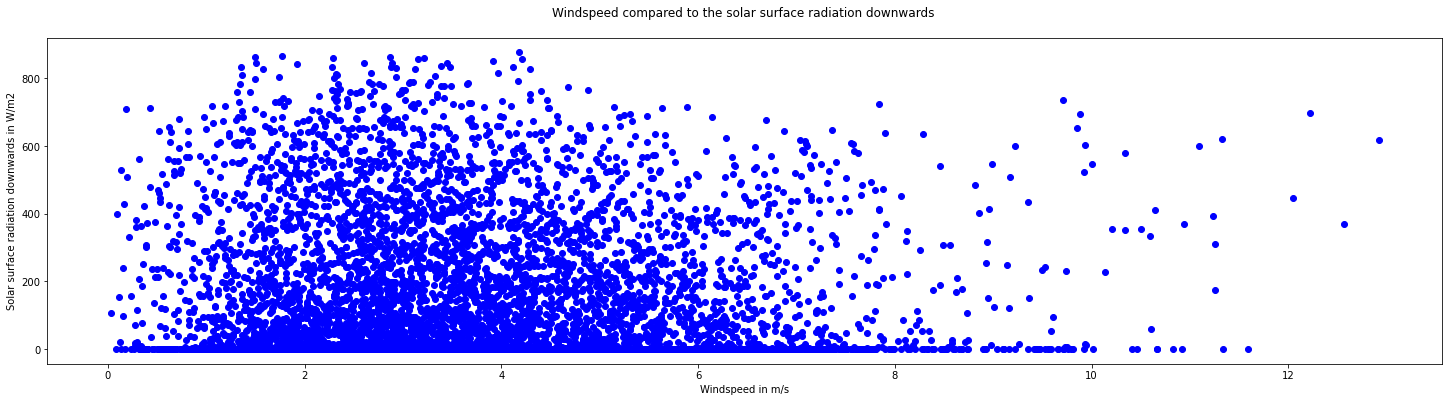

In [8]:
fig, ax = plt.subplots(figsize=(25, 6))
scatter = ax.scatter((postalcode["ws"]),
                list(postalcode["ssrd"]),
                color="blue")

ax.set(title="Windspeed compared to the solar surface radiation downwards \n",
      xlabel="Windspeed in m/s",
      ylabel="Solar surface radiation downwards in W/m2");

<h4><font color=mediumvioletred>Visualize windspeed in a single day from a specific postal code</font></h4>

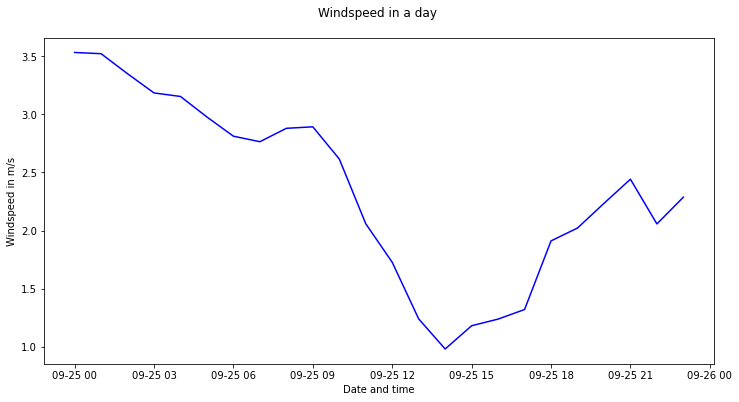

In [9]:
one_day = postalcode[postalcode['date']. dt. strftime('%Y-%m-%d')=='2021-09-25']

fig, ax = plt.subplots(figsize=(12, 6))
plot = ax.plot(list(one_day["date"]),
                list(one_day["ws"]),
                color="blue")

ax.set(title="Windspeed in a day \n",
      xlabel="Date and time",
      ylabel="Windspeed in m/s");


<h4><font color=mediumvioletred>Merge meteo and air pollution dataset and show sample</font></h4>

In [10]:
df_meteo_air_pollution = pd.merge(df_meteo, df_air_pollution[['PC4','date', 'pm10', 'pm2.5', 'no2',	'no', 'so2']], on=['PC4', 'date'])
df_meteo_air_pollution.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
17087,2021-10-27 23:00:00,5621,255.654800,3.347896,248.879211,0.019489,0.000000,11.551718,8.073826,17.171638,11.234636,1.843527
66290,2021-11-10 02:00:00,5654,270.864105,1.884394,54.965816,0.050993,0.000000,28.646254,20.451550,34.361603,22.481262,7.568698
4988,2021-10-08 20:00:00,5613,31.143515,3.122508,189.848511,0.032623,0.000000,19.242529,10.057166,33.246343,21.751597,7.739096
39503,2021-12-27 22:00:00,5631,265.910767,3.989428,349.350250,0.719894,0.000000,14.307070,24.539890,15.812389,0.188256,1.181462
41207,2021-12-01 22:00:00,5632,182.287704,3.637992,327.818970,0.784248,0.000000,16.611294,16.662697,15.534002,0.022473,1.256877
68480,2021-11-04 08:00:00,5655,202.752609,3.398211,137.678406,1.000000,34.178396,28.701380,23.665760,40.352264,26.400683,9.870021
18223,2021-12-14 06:00:00,5621,221.112717,3.169986,360.619232,0.998988,0.000000,20.655480,35.894030,20.763707,1.035571,2.779204
76688,2021-12-25 07:00:00,5658,32.404671,4.765828,417.749420,1.000000,0.000000,9.212096,17.260480,12.396814,0.183173,0.644074
22498,2021-11-28 10:00:00,5623,142.390793,2.110594,116.939377,0.999549,45.200113,44.219795,38.187885,26.218335,17.153485,1.204541
33540,2021-11-03 12:00:00,5628,22.474974,0.987736,135.903214,1.000000,163.976163,14.940767,10.927645,27.682520,18.111436,7.390963


<h4><font color=mediumvioletred>Show corrolation between merged meteo and air pollution data</font></h4>

In [11]:
df_meteo_air_pollution.corr(method='spearman')

,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
PC4,1.000000,-0.000203,-0.001175,-0.000395,-0.000085,0.000106,-0.026865,-0.028674,-0.034462,-0.027125,0.004346
wd,-0.000203,1.000000,0.190082,0.048322,0.050032,0.032333,-0.148475,-0.106274,-0.161741,-0.109364,-0.008121
ws,-0.001175,0.190082,1.000000,0.807271,0.176822,0.073962,-0.607904,-0.472557,-0.591700,-0.499212,-0.212465
blh,-0.000395,0.048322,0.807271,1.000000,0.200182,0.341155,-0.615602,-0.542800,-0.655762,-0.502562,-0.337730
tcc,-0.000085,0.050032,0.176822,0.200182,1.000000,0.001251,-0.031441,0.110042,-0.105527,-0.186421,-0.208994
ssrd,0.000106,0.032333,0.073962,0.341155,0.001251,1.000000,-0.059004,-0.158170,-0.206825,-0.049303,-0.076840
pm10,-0.026865,-0.148475,-0.607904,-0.615602,-0.031441,-0.059004,1.000000,0.886844,0.560476,0.283385,0.336788
pm2.5,-0.028674,-0.106274,-0.472557,-0.542800,0.110042,-0.158170,0.886844,1.000000,0.431592,0.014917,0.189855
no2,-0.034462,-0.161741,-0.591700,-0.655762,-0.105527,-0.206825,0.560476,0.431592,1.000000,0.735620,0.394545
no,-0.027125,-0.109364,-0.499212,-0.502562,-0.186421,-0.049303,0.283385,0.014917,0.735620,1.000000,0.371746


<h4><font color=mediumvioletred>Show corrolation between particulate matter smaller than 10 um and windspeed</font></h4>

-0.4220468437258586


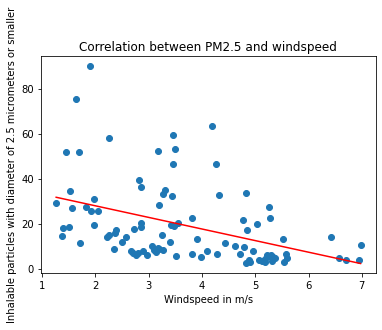

In [19]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["ws"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["ws"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["ws"]), np.poly1d(np.polyfit(group_by_day["ws"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["ws"])), color='red')
plt.title('Correlation between PM2.5 and windspeed')
plt.xlabel('Windspeed in m/s')
plt.ylabel('Inhalable particles with diameter of 2.5 micrometers or smaller');
#particulate matter <2.5um in ug/m3

-0.5270951619288825


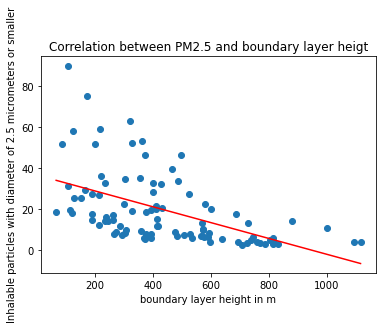

In [16]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["blh"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["blh"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["blh"]), np.poly1d(np.polyfit(group_by_day["blh"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["blh"])), color='red')
plt.title('Correlation between PM2.5 and boundary layer heigt')
plt.xlabel('boundary layer height in m')
plt.ylabel('Inhalable particles with diameter of 2.5 micrometers or smaller');
#particulate matter <2.5um in ug/m3

-0.44465439902953424


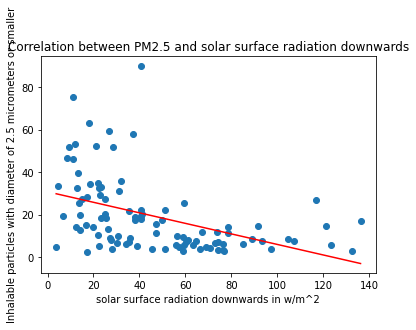

In [22]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["ssrd"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["ssrd"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["ssrd"]), np.poly1d(np.polyfit(group_by_day["ssrd"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["ssrd"])), color='red')
plt.title('Correlation between PM2.5 and solar surface radiation downwards')
plt.xlabel('solar surface radiation downwards in w/m^2')
plt.ylabel('Inhalable particles with diameter of 2.5 micrometers or smaller');
#particulate matter <2.5um in ug/m3

<h2><font color=slateblue> 5. Data Preparation </font></h2>

<h2><font color=slateblue> 6. Modelling </font></h2>